In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, writers
import seaborn as sns
import os
from PIL import Image, ImageOps
from wrangler import Wrangler
import matplotlib as mpl 
mpl.rcParams['animation.ffmpeg_path'] = r'D:\ffmpeg\bin\ffmpeg.exe'

In [3]:
all_df = Wrangler.load_pickle('data/all_df.pkl')

In [4]:
l_df = pd.read_csv('bsc-3m/signals_dense.csv')
l_xy = Wrangler.load_pickle('bsc-3m/signal_lines_true.pickle')

In [6]:
class_color = {
    'Bicycle' : 'r', 
    'Bus' : 'b', 
    'Car' : 'b', 
    'Heavy Vehicle' : 'b', 
    'Light Truck' : 'b',
    'Motorcycle' : 'b', 
    'Pedestrian' : 'g', 
    'Van' : 'b'
}

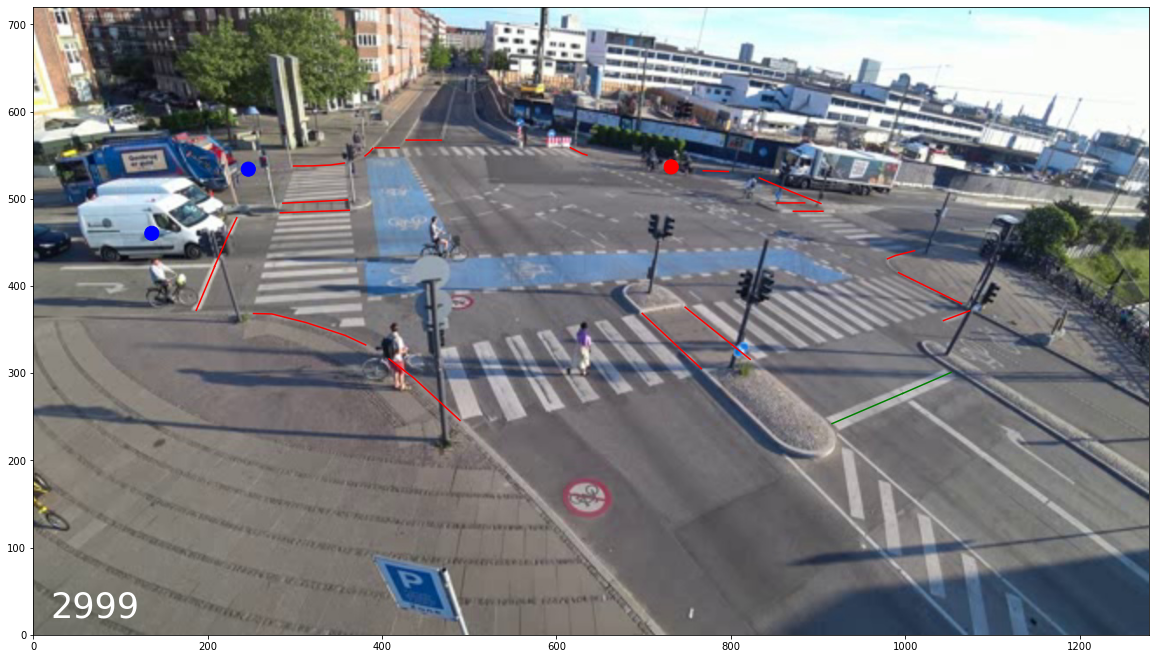

In [7]:
fig, ax = plt.subplots(figsize=(20,20))
ax.set_xlim(0,1280)
ax.set_ylim(0,720)
img = Image.open("intersection2.png")
img = ImageOps.flip(img)

im = ax.imshow(img, origin='lower')
ln = [ax.plot([],[])[0] for _ in range(l_df.shape[-1]-1)]
txt = ax.text(20,20, '', fontsize=35, color='w')
sc = ax.scatter([], [], s=200)
patches = ln + [sc] + [txt] + [im]

def init():
    for i in range(len(ln)):
        ln[i].set_data(l_xy[i]['x'], l_xy[i]['y'])
    
    return patches

def update(frame):
    row = l_df.loc[frame]
    for i in range(l_df.shape[1]-1):
        ln[i].set_color(['red', 'orange', 'yellow', 'green'][row[str(i)]])
    
    txt.set(text=str(frame))
    
    mask = all_df['frame'] == frame
    xy = all_df.loc[mask][['x', 'y']].to_numpy()
    sc.set_offsets(xy)
    sc.set(color=[class_color[row['class']] for _, row in all_df.loc[mask].iterrows()])
    
    img = Image.open('frames/frame'+str(frame)+'.jpg') #+ pic_frames[frame])
    img = ImageOps.flip(img)
    im.set_array(img)
    
    return patches

ani = FuncAnimation(fig, update, frames=np.arange(0,3000),    # np.arange(0, 12000, 10), # interval=30,
                    init_func=init)#, blit=True)

Writer = writers['ffmpeg']
writer = Writer(fps=30) # , bitrate=1800)
ani.save('paiosjfasiop0djaiop.mp4', writer)